#### ONLC: Python for Data Science


# Pandas and Datetimes

Pandas helps ease the pain of timezones, even as it provides many useful tools for generating ```DateTimeIndex``` based time Series.

In [2]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np

In [35]:
# pd.date_range?

[offset aliases](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries-offset-aliases)

In [3]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')

In [4]:
rng

DatetimeIndex(['2012-03-09 09:30:00', '2012-03-10 09:30:00',
               '2012-03-11 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00'],
              dtype='datetime64[ns]', freq='D')

In [5]:
type(rng)

pandas.core.indexes.datetimes.DatetimeIndex

In [6]:
rng2 = pd.date_range('3/9/2012 9:30', periods=6, freq='M')

In [7]:
rng2

DatetimeIndex(['2012-03-31 09:30:00', '2012-04-30 09:30:00',
               '2012-05-31 09:30:00', '2012-06-30 09:30:00',
               '2012-07-31 09:30:00', '2012-08-31 09:30:00'],
              dtype='datetime64[ns]', freq='M')

In [8]:
ts = Series(np.random.randn(len(rng)), index=rng)
type(ts)

pandas.core.series.Series

In [9]:
ts

2012-03-09 09:30:00    0.391173
2012-03-10 09:30:00    0.181455
2012-03-11 09:30:00   -0.862158
2012-03-12 09:30:00    0.429477
2012-03-13 09:30:00   -0.492355
2012-03-14 09:30:00   -1.527031
Freq: D, dtype: float64

So far, these series are innocent of any timezone awareness.

In [10]:
ts.index.tz  # returns None

In [11]:
rng.tz  # returns None

Lets localize!

In [12]:
ts_utc = ts.tz_localize('UTC')

In [13]:
ts_utc.index.tz

<UTC>

In [14]:
ts_utc

2012-03-09 09:30:00+00:00    0.391173
2012-03-10 09:30:00+00:00    0.181455
2012-03-11 09:30:00+00:00   -0.862158
2012-03-12 09:30:00+00:00    0.429477
2012-03-13 09:30:00+00:00   -0.492355
2012-03-14 09:30:00+00:00   -1.527031
Freq: D, dtype: float64

In [15]:
ts_pacific = ts_utc.tz_convert('US/Pacific')
ts_pacific

2012-03-09 01:30:00-08:00    0.391173
2012-03-10 01:30:00-08:00    0.181455
2012-03-11 01:30:00-08:00   -0.862158
2012-03-12 02:30:00-07:00    0.429477
2012-03-13 02:30:00-07:00   -0.492355
2012-03-14 02:30:00-07:00   -1.527031
Freq: D, dtype: float64

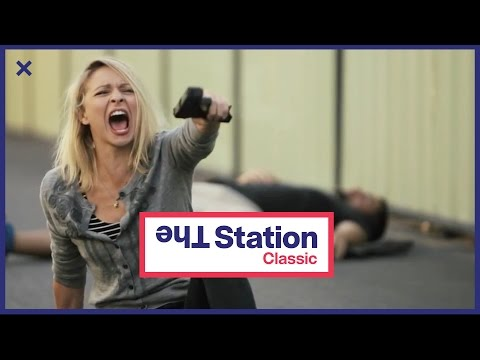

In [16]:
from IPython.display import YouTubeVideo
YouTubeVideo("k4EUTMPuvHo")

In [17]:
ts_eastern = ts_pacific.tz_convert('US/Eastern')
ts_eastern

2012-03-09 04:30:00-05:00    0.391173
2012-03-10 04:30:00-05:00    0.181455
2012-03-11 05:30:00-04:00   -0.862158
2012-03-12 05:30:00-04:00    0.429477
2012-03-13 05:30:00-04:00   -0.492355
2012-03-14 05:30:00-04:00   -1.527031
Freq: D, dtype: float64

In [18]:
ts_berlin = ts_pacific.tz_convert('Europe/Berlin')
ts_berlin

2012-03-09 10:30:00+01:00    0.391173
2012-03-10 10:30:00+01:00    0.181455
2012-03-11 10:30:00+01:00   -0.862158
2012-03-12 10:30:00+01:00    0.429477
2012-03-13 10:30:00+01:00   -0.492355
2012-03-14 10:30:00+01:00   -1.527031
Freq: D, dtype: float64

# Timestamp type (for individual datetimes)

In [19]:
stamp = pd.Timestamp('2011-03-12 04:00')

In [20]:
stamp2 = pd.Timestamp('Wed May 23 11:35:54 2018') # will this work too?

In [21]:
type(stamp2)

pandas._libs.tslibs.timestamps.Timestamp

In [22]:
stamp2_pac = stamp2.tz_localize('US/Pacific')
stamp2_pac

Timestamp('2018-05-23 11:35:54-0700', tz='US/Pacific')

In [23]:
stamp2_pac.tz_convert('Europe/Moscow')

Timestamp('2018-05-23 21:35:54+0300', tz='Europe/Moscow')

In [24]:
stamp2_pac.value # nanoseconds since the UNIX Epoch, Jan 1 1970

1527100554000000000

In [25]:
stamp2_pac.tz_convert('Europe/Moscow').value

1527100554000000000

In [26]:
stamp3 = pd.Timestamp('Wed May 23 11:35:54 1950') 

In [27]:
stamp3.value  # negative number because before the UNIX Epoch

-618841446000000000

In [28]:
ts

2012-03-09 09:30:00    0.391173
2012-03-10 09:30:00    0.181455
2012-03-11 09:30:00   -0.862158
2012-03-12 09:30:00    0.429477
2012-03-13 09:30:00   -0.492355
2012-03-14 09:30:00   -1.527031
Freq: D, dtype: float64

In [29]:
ts_sum = ts_eastern + ts_utc.tz_convert("Europe/Moscow")

In [30]:
ts_sum.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

### LAB CHALLENGE

What time is it right now in:

* Moscow
* Berlin
* Tokyo

In [31]:
pd.Timestamp.now(tz='US/Pacific')  #  getting you started

Timestamp('2018-07-26 19:11:14.715867-0700', tz='US/Pacific')